In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas.io.data import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division


In [6]:
#I picked Nike,Liberty Property,American Express,Moody
folder_list = ['NKE','LPT','AXP','MCO']

# Set up End and Start times for data grab
# 1 yr from now
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
# globals()[stock] trying to make [stock] a global variable
for stock in folder_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)



In [7]:
NKE.describe()

,Open,High,Low,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,103.119243,103.926733,102.312151,103.184781,3510482.868526,102.667046
std,9.139784,9.241239,9.030654,9.174307,1925596.438713,9.446139
min,86.800003,88.930000,86.769997,88.900002,1219800.000000,87.925145
25%,96.189999,96.959999,95.465000,96.155003,2523200.000000,95.374034
50%,100.459999,101.080002,99.720001,100.419998,3084200.000000,99.893280
75%,110.235000,111.185001,109.139999,110.449997,3691800.000000,110.310223
max,129.500000,130.589996,128.869995,130.470001,18446100.000000,130.470001


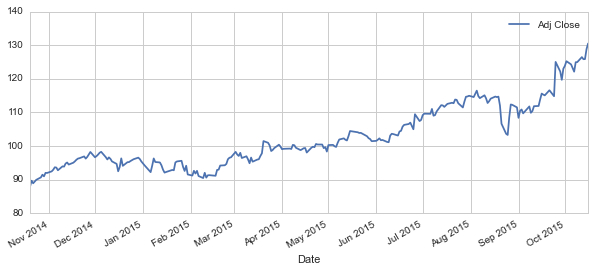

In [8]:
# Let's see a historical view of the closing price
NKE['Adj Close'].plot(legend=True,figsize=(10,4))

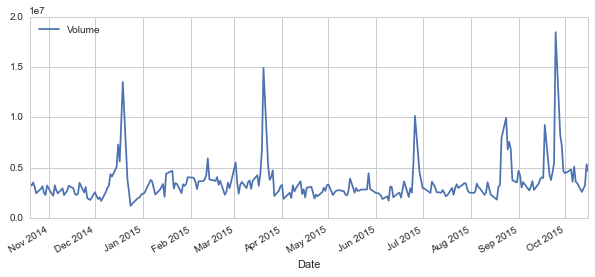

In [9]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
NKE['Volume'].plot(legend=True,figsize=(10,4))

In [11]:
NKE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2014-10-20 to 2015-10-16
Data columns (total 6 columns):
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Volume       251 non-null int64
Adj Close    251 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [41]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(['NKE','LPT','AXP','MCO'],'yahoo',start,end)['Adj Close']

In [26]:
p_rets = closing_df.pct_change()

C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


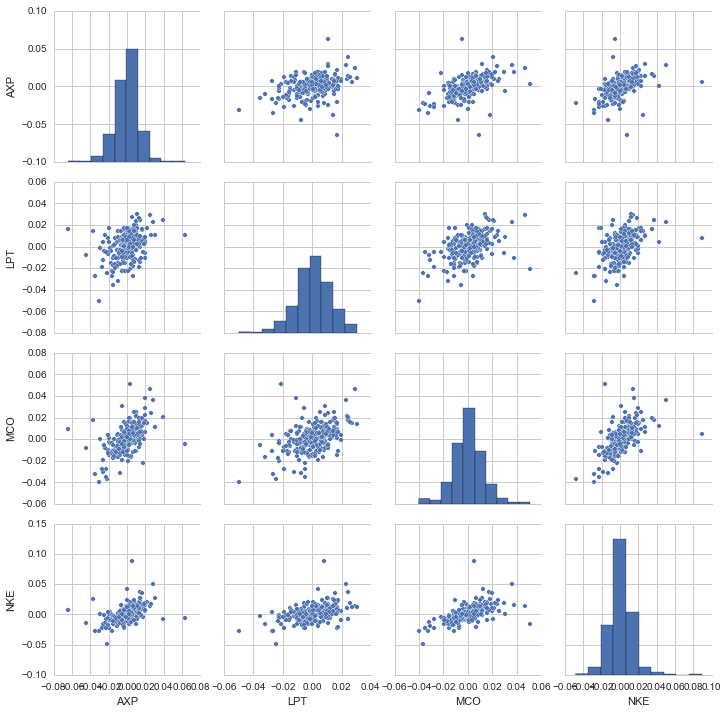

In [29]:
from IPython.display import SVG
sns.pairplot(p_rets.dropna())

C:\Anaconda\lib\site-packages\seaborn\linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Anaconda\lib\site-packages\seaborn\linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


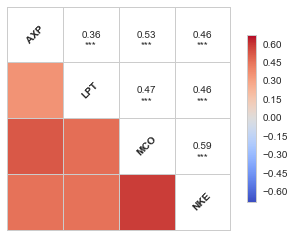

In [30]:
sns.corrplot(p_rets.dropna(),annot=True)

In [31]:
#Yet,here we found they are all rather correlated by the figures shown above
#But we do not want all positive numbers,
#So here,we need to diversify our portfolio
#Goal:to get a few negative figures  

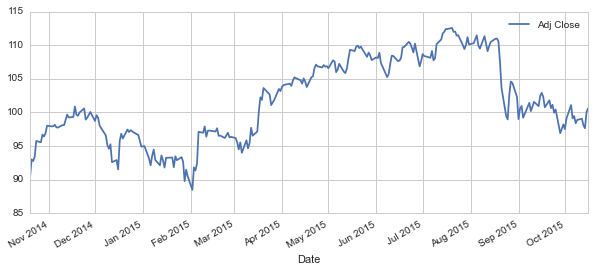

In [32]:
#we have found Nike a very healthy stock,so we keep it
#Now,we explore MCO
MCO['Adj Close'].plot(legend=True,figsize=(10,4))

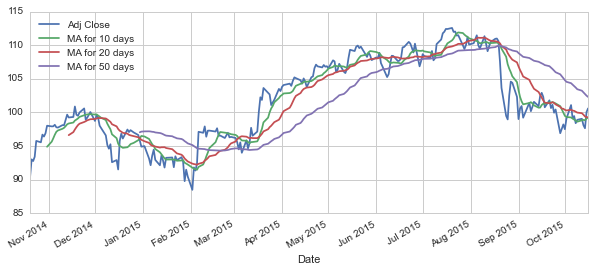

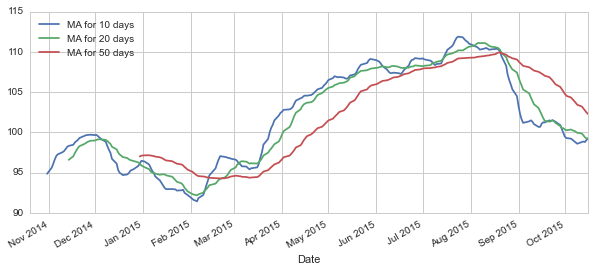

In [36]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    MCO[column_name]=pd.rolling_mean(MCO['Adj Close'],ma)
MCO[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))
MCO[['MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))


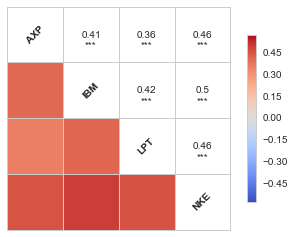

In [43]:
# Here,I want to replace MCO with IBM since it is positively correlated with the other 2 stocks
closing_df = DataReader(['NKE','LPT','AXP','IBM'],'yahoo',start,end)['Adj Close']
p_rets = closing_df.pct_change()
sns.corrplot(p_rets.dropna(),annot=True)

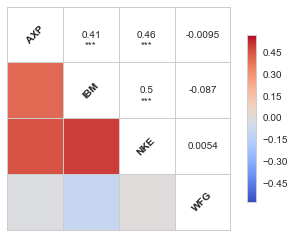

In [44]:
#Apparently IBM has not achived our goal,so now I tried to replace LPT with WFG
closing_df = DataReader(['NKE','WFG','AXP','IBM'],'yahoo',start,end)['Adj Close']
p_rets = closing_df.pct_change()
sns.corrplot(p_rets.dropna(),annot=True)


In [45]:
# Now we realize WFG did bring in some effects to the table
# so I will explore WFG
end = datetime.now()
start = datetime(end.year - 5,end.month,end.day)
globals()['WFG'] = DataReader('WFG','yahoo',start,end)

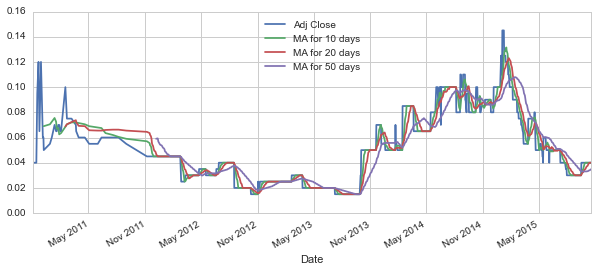

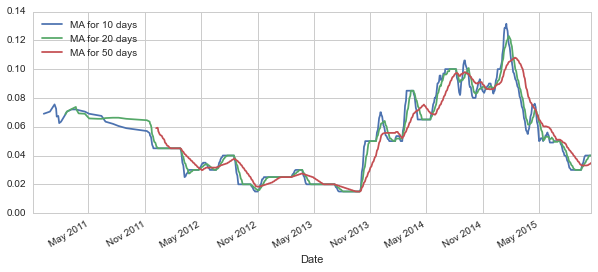

In [49]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    WFG[column_name]=pd.rolling_mean(WFG['Adj Close'],ma)
WFG[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))
WFG[['MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))


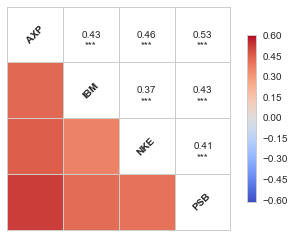

In [50]:
#Aparently,WFG has not done well.And its business economy relies heavily on the housing market and
#it has lagged behind in its corporate efficiency due to overly outsourcing labor and lack of technology
#and talent inhouse development
#Thus,I will switch it again.
closing_df = DataReader(['NKE','PSB','AXP','IBM'],'yahoo',start,end)['Adj Close']
p_rets = closing_df.pct_change()
sns.corrplot(p_rets.dropna(),annot=True)




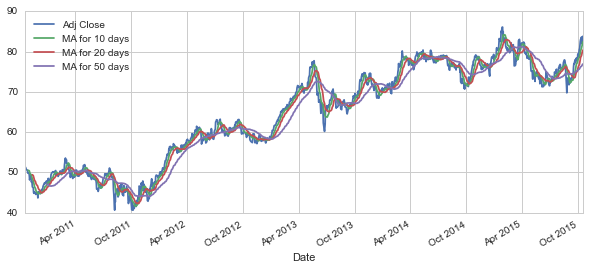

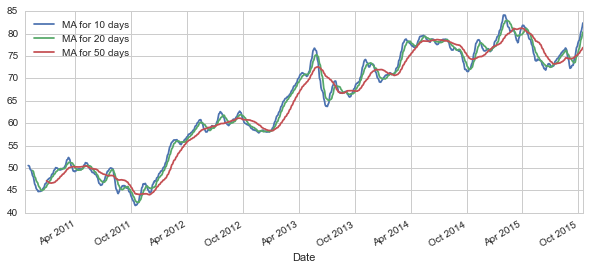

In [53]:
end = datetime.now()
start = datetime(end.year - 5,end.month,end.day)
globals()['PSB'] = DataReader('PSB','yahoo',start,end)

ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    PSB[column_name]=pd.rolling_mean(PSB['Adj Close'],ma)
PSB[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))
PSB[['MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

In [54]:
#It is a good stock
#Thus,I want to change IBM to Walmart again.

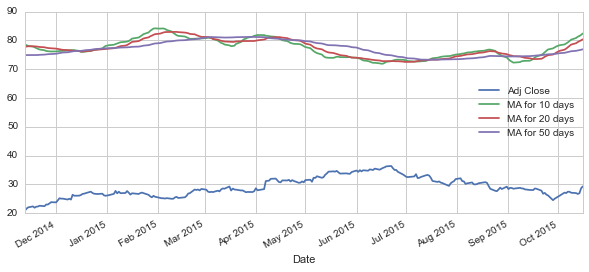

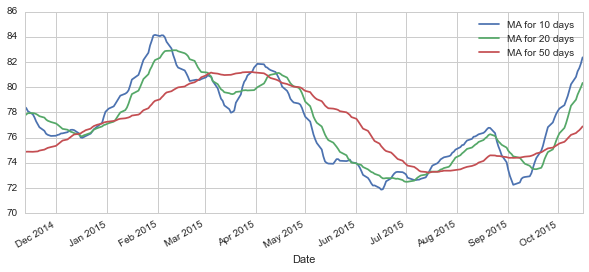

In [56]:
end = datetime.now()
start = datetime(end.year - 5,end.month,end.day)
globals()['AXTA'] = DataReader('AXTA','yahoo',start,end)

ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AXTA[column_name]=pd.rolling_mean(PSB['Adj Close'],ma)
AXTA[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))
AXTA[['MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

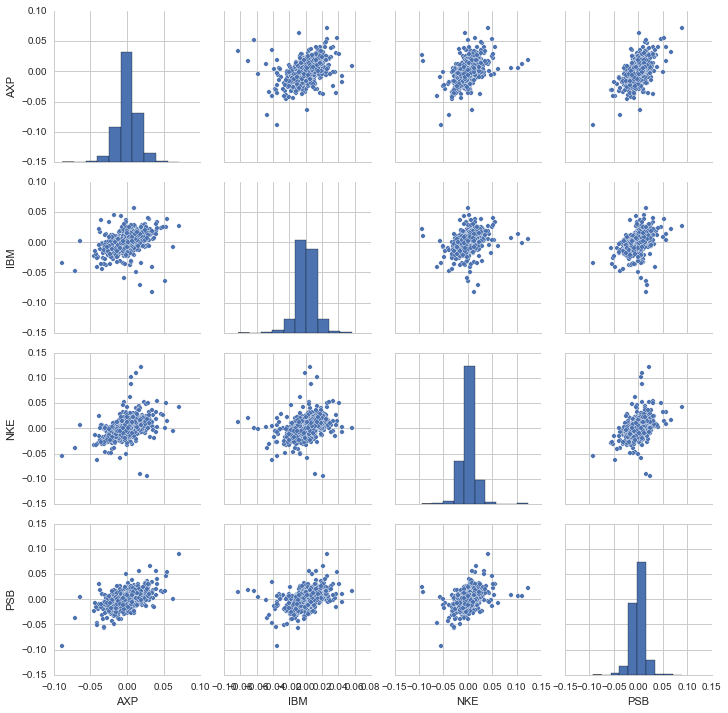

In [96]:
sns.pairplot(p_rets.dropna())

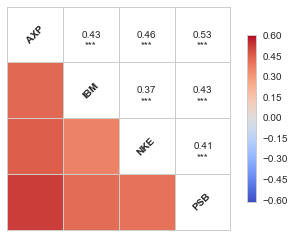

In [97]:
#Still,it seems AXIA is a pretty young stock,so I prefer IBM
closing_df = DataReader(['NKE','PSB','AXP','IBM'],'yahoo',start,end)['Adj Close']
p_rets = closing_df.pct_change()
sns.corrplot(p_rets.dropna(),annot=True)



In [69]:
#Thus far,we have a hard time in searching for a negative correlated stock
# Now,we will evaluate values at risk for all stocks.



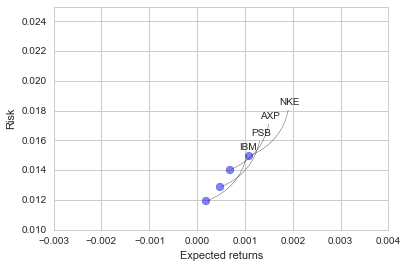

In [75]:
closing_df = DataReader(['NKE','PSB','AXP','IBM'],'yahoo',start,end)['Adj Close']
p_rets = closing_df.pct_change()

rets = p_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot 
#(optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))
    

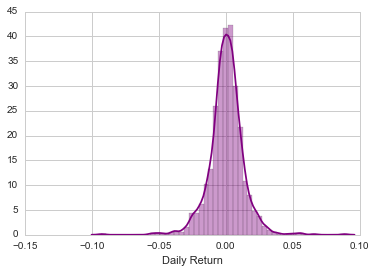

In [80]:
#Here, I wanna assess PSB's values at risk
PSB['Daily Return'] = PSB['Adj Close'].pct_change()
sns.distplot(PSB['Daily Return'].dropna(),bins=50,color='purple')


In [81]:
#It looks pretty normal.
rets['PSB'].quantile(0.05)

-0.020039598723499273

In [82]:
# The 0.05 empirical quantile of daily returns is at -0.02
# That means that with 95% confidence, 
# our worst daily loss will not exceed 2%.


In [84]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['PSB']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['PSB']

In [85]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    #numpy.zero(number) means creating a "number" of zeros in a array,
    #dynamic programming
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [86]:
closing_df.head()

,AXP,IBM,NKE,PSB
Date,,,,
2010-10-18,36.984459,128.734257,38.194735,50.674815
2010-10-19,36.760030,124.407962,37.759747,50.143703
2010-10-20,37.152783,125.345333,37.998286,51.366104
2010-10-21,37.657755,126.030324,38.405212,51.045750
2010-10-22,36.498190,125.886111,38.316342,50.750689


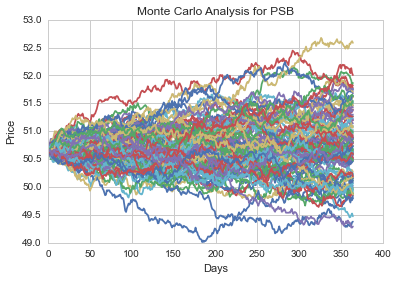

In [88]:
start_price = 50.6748

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for PSB')


In [89]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

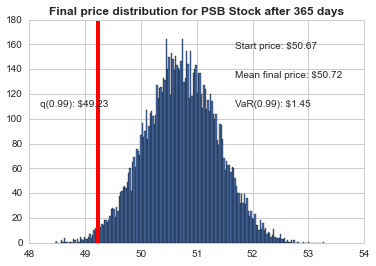

In [90]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for PSB Stock after %s days" % days, weight='bold');


In [91]:
# Now we have looked at the 1% empirical quantile 
# of the final price distribution 
# to estimate the Value at Risk for the PSB stock, 
# which looks to be $1.45
#for every investment of $49.23